In [4]:
### Plot inline
%matplotlib inline
#'exec(%matplotlib inline)'
# Increase plotting resolution to vector format
%config InlineBackend.figure_format = 'svg'

from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np
from IPython import display
import matplotlib.gridspec as gridspec
import sys

import math as math
import datetime
from datetime import timedelta
import os
import glob
print (sys.path)
import pandas as pd
#import seaborn as sns
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, YearLocator
from magnetometer_utils import *
from model_utils import *

['/home/jp/Desktop-ROJ/Magnetometer', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/jp/.local/lib/python3.10/site-packages', '/home/jp/Desktop-ROJ/FPIs/pyHWM14', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages/IPython/extensions', '/home/jp/.ipython']


In [5]:
def GetHStationSeries(data_directory, est, PlotFlag):
#########################################################################
## Función que retorna la serie de tiempo de la variación diurna 
## de H correspondiente a una estación.
## Inputs:
## data_directory: str - ruta a los archivos *min de la estación.
## est: int - número de la estación (Piura, 0; Jicamarca, 1; Huancayo, 2; 
### Nazca, 3 and Arequipa, 4).
## PlotFlag: boolean para graficar.
## Output: pandas.Series - serie de tiempo de la estación correspondiente.
########################################################################
    str_test = data_directory
    str_search = str_test + os.sep + '*.min'
    h_list = []
    for file_temp in glob.glob(str_search):
        print("File in station: ", file_temp)
        magFile_roj = file_temp
        magData_roj = pd.read_csv(magFile_roj,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)"])
        h_field_roj = GetTimesSeriesH(magData_roj)# - baseline_series
        time1 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
        time2 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
        baseline_roj = h_field_roj[time1:time2].mean()
        h_field_sub_roj = h_field_roj - baseline_roj
        h_list.append(h_field_sub_roj)
        str_date = '%d-%02d-%02d' % (h_field_roj.index[0].year, h_field_roj.index[0].month, h_field_roj.index[0].day)
        if (PlotFlag):   # magData_roj = pd.read_csv(magFile_roj,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "D(deg)","H(nT)","Z(nT)"])

            fig1, ax1 = plt.subplots(figsize=(16,8))
            h_field_roj.plot()
            ax1.set_title(r'Componente Horizontal Campo Geomagnético H(nT) - %s:' % str_date, fontsize=23)
            ax1.set_xlabel('UT (h)', fontsize=25)
            ax1.set_ylabel('H (nT) ', color=colors[est], fontsize=25)
            plt.savefig('%s/%s/H-%s-%s.png' % (dir_plots,stations[est],stations[est],str_date))
            plt.close()
            #h_field_sub_roj.plot()
            fig2, ax2 = plt.subplots(figsize=(16,8))
            ax2.tick_params(axis='x',labelsize=25)
            h_field_sub_roj.plot()
            ax2.set_title(r'H - $H_{offset}$(nT) - %s:' % str_date, fontsize=23)
            ax2.set_xlabel('UT (h)', fontsize=25)
            ax2.set_ylabel('H (nT) ', color=colors[est], fontsize=25)
            ax2.tick_params(axis='y',labelsize=25)
            plt.savefig('%s/%s/no-offset-H-%s-%s.png' % (dir_plots,stations[est],stations[est],str_date))
            plt.close()
            h_field_sub_roj.plot()
            plt.close()
    h_list = pd.concat(h_list)
    return h_list                                                   

In [6]:
def GetAbsoluteHStationSeries(data_directory, est, PlotFlag):
#########################################################################
## Función que retorna la serie de tiempo de las mediciones absolutas
## de H correspondiente a una estación.
## Inputs:
## data_directory: str - ruta a los archivos *min de la estación.
## est: int - número de la estación (Piura, 0; Jicamarca, 1; Huancayo, 2;
### Nazca, 3 and Arequipa, 4).
## PlotFlag: boolean para graficar.
## Output: pandas.Series - serie de tiempo de la estación correspondiente.
########################################################################
    str_test = data_directory
    str_search = str_test + os.sep + '*.min'
    h_list = []
    for file_temp in glob.glob(str_search):
        #print("File in station: ", file_temp)
        magFile_roj = file_temp
        magData_roj = pd.read_csv(magFile_roj,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm","H(nT)","Z(nT)"])
        h_field_roj = GetTimesSeriesH(magData_roj)# - baseline_series
        time1 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 3, 0, 0) #- pd.Timedelta(hours=5)
        time2 = datetime.datetime(h_field_roj.index.year[0], h_field_roj.index.month[0], h_field_roj.index.day[0], 7, 0, 0) #- pd.Timedelta(hours=5)
        baseline_roj = h_field_roj[time1:time2].mean()
        h_field_sub_roj = h_field_roj #- baseline_roj
        h_list.append(h_field_sub_roj)
        str_date = '%d-%02d-%02d' % (h_field_roj.index[0].year, h_field_roj.index[0].month, h_field_roj.index[0].day)
        if (PlotFlag):   # magData_roj = pd.read_csv(magFile_roj,delimiter=r"\s+", skiprows=2,usecols= ["DD","MM","YYYY", "hh", "mm", "D(deg)","H(nT)","Z(nT)"])

            fig1, ax1 = plt.subplots(figsize=(16,8))
            h_field_roj.plot()
            ax1.set_title(r'Componente Horizontal Campo Geomagnético H(nT) - %s:' % str_date, fontsize=23)
            ax1.set_xlabel('UT (h)', fontsize=25)
            ax1.set_ylabel('H (nT) ', color=colors[est], fontsize=25)
            plt.savefig('%s/%s/H-%s-%s.png' % (dir_plots,stations[est],stations[est],str_date))
            plt.close()
            #h_field_sub_roj.plot()
            fig2, ax2 = plt.subplots(figsize=(16,8))
            ax2.tick_params(axis='x',labelsize=25)
            h_field_sub_roj.plot()
            ax2.set_title(r'H - $H_{offset}$(nT) - %s:' % str_date, fontsize=23)
            ax2.set_xlabel('UT (h)', fontsize=25)
            ax2.set_ylabel('H (nT) ', color=colors[est], fontsize=25)
            ax2.tick_params(axis='y',labelsize=25)
            plt.savefig('%s/%s/no-offset-H-%s-%s.png' % (dir_plots,stations[est],stations[est],str_date))
            plt.close()
            h_field_sub_roj.plot()
            plt.close()
    h_list = pd.concat(h_list)
    return h_list

### Notebook que sirve para estimar el promedio horario de la variación diurna de H de un mes determinado para todas las estaciones disponibles de ese mes. Se requiere una estructura de directorios pre-existente con los archivos .min ya descargados, por ejemplo, para la estación de Jicamarca: Magnetometer-data/Noviembre-2023-Data/Jicamarca/

In [7]:
### Definiendo mes y año
year = 2023
month = 11
### Función que convierte el número del mes (1-13) 
### a un string (Enero - Noviembre-Diciembre).
str_month = GetMonth(month)
current_month =  '%s-%d' % (str_month,year)
dir_plots = '%s-Plots' % current_month
dir_data = '%s-Data' % current_month
#### Definimos trayectoria para guardar gráficos:
plots_boletin = '/home/jp/Desktop-ROJ/Plots-Boletines/%02d/%s' % (year,str_month)
dir_plots = '%s-Plots' % current_month
##### Estaciones usuales de LISN ######################################3
stations = ['Piura','Jicamarca', 'Huancayo','Nazca','Arequipa']#,'Tarapoto']
prefix = ['piur','jica', 'huan', 'nazc', 'areq']#,'tara']
colors = ['tab:cyan','tab:blue','tab:green', 'tab:orange', 'tab:gray']

In [11]:
PlotFlag = True
#print(stations)
##############################################################
#### String con las trayectorias a los archivos .min #########
##############################################################
str_test0 =  dir_data+os.sep+stations[0]
str_test1 =  dir_data+os.sep+stations[1]
str_test2 =  dir_data+os.sep+stations[2]
str_test3 =  dir_data+os.sep+stations[3]
str_test4 =  dir_data+os.sep+stations[4]
##############################################################
### Obteniendo las series de tiempo de cada estación ########
#############################################################
h_list_piura = GetAbsoluteHStationSeries(str_test0, 0, PlotFlag)
h_list_roj = GetAbsoluteHStationSeries(str_test1, 1, PlotFlag)
h_list_huancayo = GetAbsoluteHStationSeries(str_test2, 2, PlotFlag)
h_list_nazca = GetAbsoluteHStationSeries(str_test3, 3, PlotFlag)
h_list_arequipa = GetAbsoluteHStationSeries(str_test4, 4, PlotFlag)

#print(str_test0,str_test1, str_test2, str_test3, str_test4)

### Graficamos las series de tiempo de las mediciones absolutas

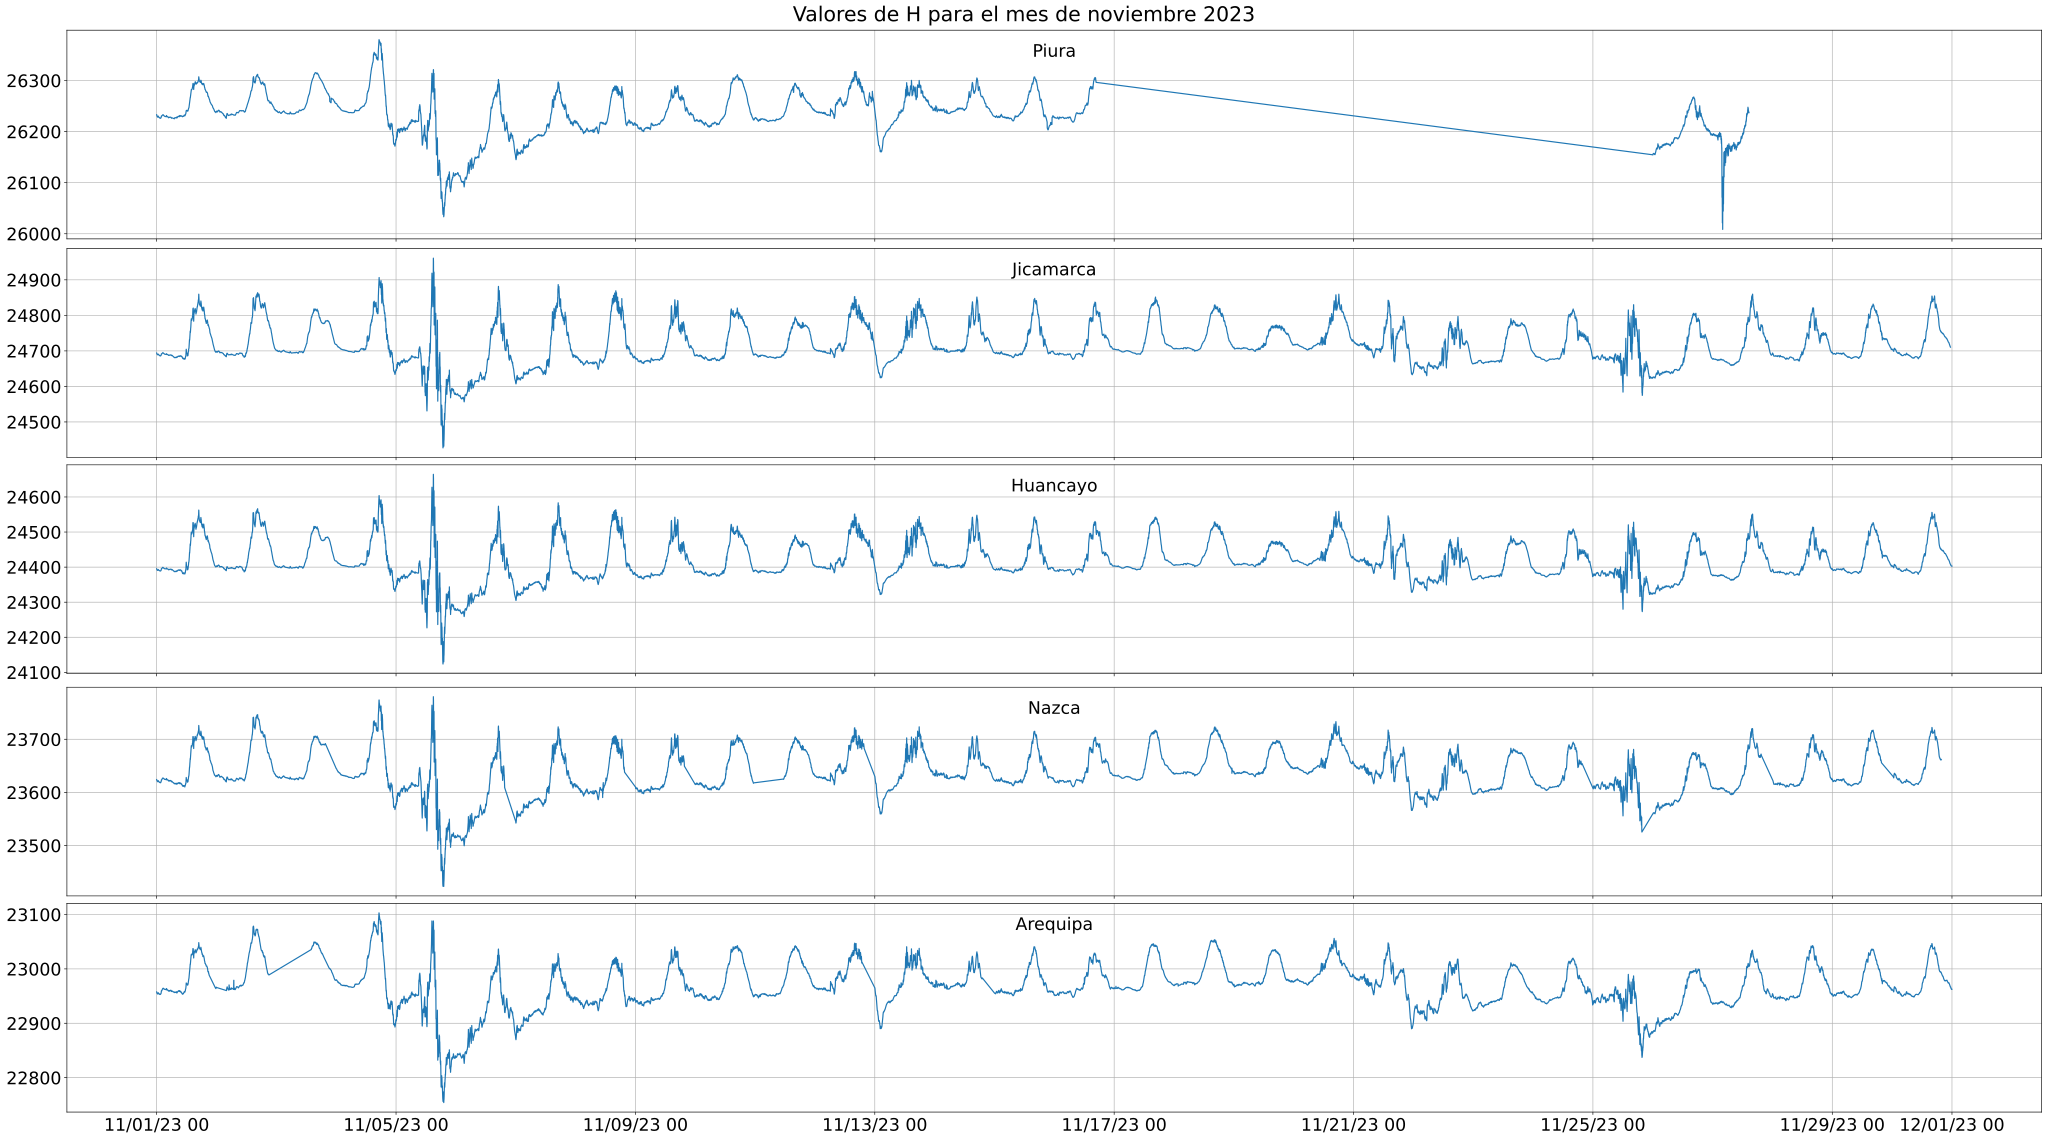

In [13]:
fontsize = 22
str_i = '2023-%02d-01 00:00:00' % month
str_f = '2023-%02d-30 23:59:00' % month
myFmt = mdates.DateFormatter('%D %H')
#myFmt = mdates.DateFormatter('%d/%H')
fig, ax = plt.subplots(5,1,figsize=(36,20),sharex=True,constrained_layout=True)
ax[0].plot(np.array(h_list_piura.sort_index().loc[str_i:str_f].index), np.array(h_list_piura.sort_index().loc[str_i:str_f].values))
ax[0].xaxis.set_major_formatter(myFmt)
ax[0].grid()
ax[0].set_title('Piura', fontsize=fontsize,x=0.5,y=0.85)
ax[0].tick_params(axis='y', labelsize=fontsize)
ax[0].tick_params(axis='x', labelsize=fontsize)

ax[1].plot(np.array(h_list_roj.sort_index().loc[str_i:str_f].index), np.array(h_list_roj.sort_index().loc[str_i:str_f].values))
ax[1].xaxis.set_major_formatter(myFmt)
ax[1].grid()
ax[1].set_title('Jicamarca', fontsize=fontsize,x=0.5,y=0.85)
ax[1].tick_params(axis='y', labelsize=fontsize)
ax[1].tick_params(axis='x', labelsize=fontsize)

ax[2].plot(np.array(h_list_huancayo.sort_index().loc[str_i:str_f].index), np.array(h_list_huancayo.sort_index().loc[str_i:str_f].values))
ax[2].xaxis.set_major_formatter(myFmt)
ax[2].grid()
ax[2].set_title('Huancayo', fontsize=fontsize,x=0.5,y=0.85)
ax[2].tick_params(axis='y', labelsize=fontsize)
ax[2].tick_params(axis='x', labelsize=fontsize)

ax[3].plot(np.array(h_list_nazca.sort_index().loc[str_i:str_f].index), np.array(h_list_nazca.sort_index().loc[str_i:str_f].values))
ax[3].xaxis.set_major_formatter(myFmt)
ax[3].grid()
ax[3].set_title('Nazca', fontsize=fontsize,x=0.5,y=0.85)
ax[3].tick_params(axis='y', labelsize=fontsize)
ax[3].tick_params(axis='x', labelsize=fontsize)
ax[4].plot(np.array(h_list_arequipa.sort_index().loc[str_i:str_f].index), np.array(h_list_arequipa.sort_index().loc[str_i:str_f].values))
ax[4].xaxis.set_major_formatter(myFmt)
ax[4].grid()
ax[4].set_title('Arequipa', fontsize=fontsize,x=0.5,y=0.85)
ax[4].tick_params(axis='y', labelsize=fontsize)
ax[4].tick_params(axis='x', labelsize=fontsize)
fig.suptitle('Valores de H para el mes de %s 2023' % str_month.lower(),fontsize=fontsize+4)
#fig.suptitle('Variación diurna de H para el mes de %s 2023' % str_month.lower(),fontsize=fontsize+4)
#plt.savefig('time-series-all-stations-')
#plt.savefig('Time-series-2023/%s/time-series-all-stations.png' % (str_month),bbox_inches='tight')
plt.savefig('%s/%s-time-series-all-stations.png' % (plots_boletin,str_month.lower()),bbox_inches='tight')
#print(dir_plots)

### Ahora para la variación diurna

In [14]:
PlotFlag = True
h_avg_list = []
h_std_list = []
for i in range(len(stations)):
    print("********************************************")
    print(stations[i])
    str_station = stations[i]
    str_test = dir_data+os.sep+str_station#'%s_2008_month.min' #% prefix[i]
    print(str_test)
    h_list = GetHStationSeries(str_test, i, PlotFlag)
    h_avg = h_list.groupby(h_list.index.hour).mean()
    h_std = h_list.groupby(h_list.index.hour).std()
    h_avg_list.append(h_avg)
    h_std_list.append(h_std)
    print("*...*")
    print("*...*")
    print("********************************************")


********************************************
Piura
Noviembre-2023-Data/Piura
File in station:  Noviembre-2023-Data/Piura/piur_231110.min
File in station:  Noviembre-2023-Data/Piura/piur_231103.min
File in station:  Noviembre-2023-Data/Piura/piur_231101.min
File in station:  Noviembre-2023-Data/Piura/piur_231108.min
File in station:  Noviembre-2023-Data/Piura/piur_231106.min
File in station:  Noviembre-2023-Data/Piura/piur_231112.min
File in station:  Noviembre-2023-Data/Piura/piur_231126.min
File in station:  Noviembre-2023-Data/Piura/piur_231111.min
File in station:  Noviembre-2023-Data/Piura/piur_231107.min
File in station:  Noviembre-2023-Data/Piura/piur_231115.min
File in station:  Noviembre-2023-Data/Piura/piur_231105.min
File in station:  Noviembre-2023-Data/Piura/piur_231102.min
File in station:  Noviembre-2023-Data/Piura/piur_231109.min
File in station:  Noviembre-2023-Data/Piura/piur_231127.min
File in station:  Noviembre-2023-Data/Piura/piur_231104.min
File in station:  Novie

File in station:  Noviembre-2023-Data/Arequipa/areq_231113.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231120.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231106.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231119.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231111.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231114.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231107.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231127.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231125.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231102.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231103.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231105.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231122.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231116.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231115.min
File in station:  Noviembre-2023-Data/Arequipa/areq_231

Piura 78.43102920836294
Jicamarca 124.81269239019335
Huancayo 117.66722291545105
Nazca 79.1598723893196
Arequipa 76.25412329862368


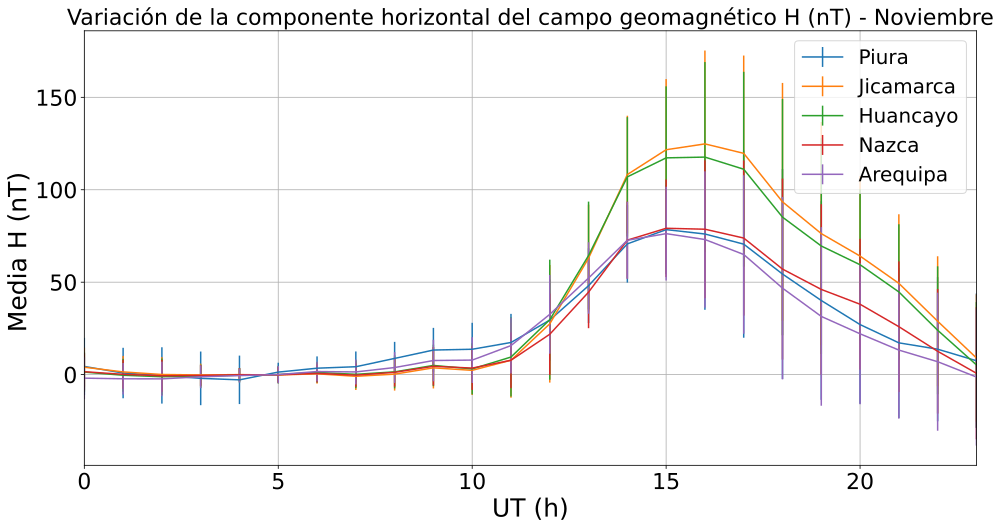

In [15]:
plot_format = 'png'
fig3, ax3 = plt.subplots(figsize=(16,8))
for i in range(len(stations)):
    h_avg_list[i].plot(yerr=h_std_list[i],label=stations[i])
    print(stations[i], max(h_avg_list[i]))
    ax3.set_xlabel('UT (h)', fontsize=25)
    ax3.set_ylabel('Media H (nT) ', fontsize=25)
    ax3.set_title('Variación de la componente horizontal del campo geomagnético H (nT) - %s' % str_month, fontsize=22)
    ax3.tick_params(axis='y', labelsize=22)
    ax3.tick_params(axis='x', labelsize=22)
    ax3.set_xlim(0,23)
    plt.grid(True)
    plt.legend(fontsize=20,loc="best")
str_plotname_png = '%s/Figura7.%s' % (plots_boletin,plot_format)
str_plotname_pdf = '%s/Figura7.%s' % (plots_boletin,'pdf')

plt.savefig(str_plotname_png,bbox_inches="tight")
plt.savefig(str_plotname_pdf,bbox_inches="tight")